In [44]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [45]:
heart=pd.read_csv("Heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [47]:
#sb.pairplot(heart)

In [48]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

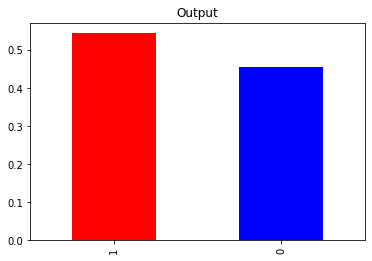

In [51]:
# target variable
heart['output'].value_counts(normalize=True).plot.bar(color=['red','blue'],title='Output')
#Around 55% people have more chances to get heart attack
#Around 45% people have less chances to get heart attack


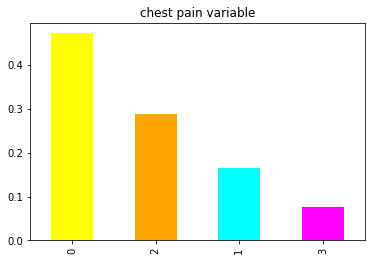

In [56]:
# cp variable
heart['cp'].value_counts(normalize=True).plot.bar(color=['yellow','orange','cyan','magenta'],title='chest pain variable')
#Around 50 % of the people have chest pain type: Typical Angina
#Around 28 % of the people have chest pain type: Non-anginal Pain
#Around less than 20 % of the people have chest pain type: Atypical Angina
#Around less than 10% of the people have chest pain type: Asymptomatic


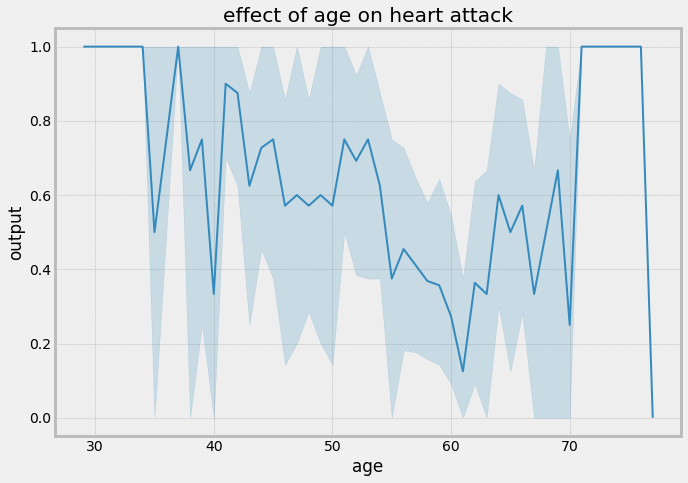

In [64]:
plt.figure(figsize=(10,7))
plt.style.use("bmh")
plt.title("effect of age on heart attack")
sns.lineplot(x=heart['age'],y=heart['output'])
#people with the age 30 to 35 have higher chance of heart attacks
#people with the age than 70 and less than 75 have higher chance of heart attacks



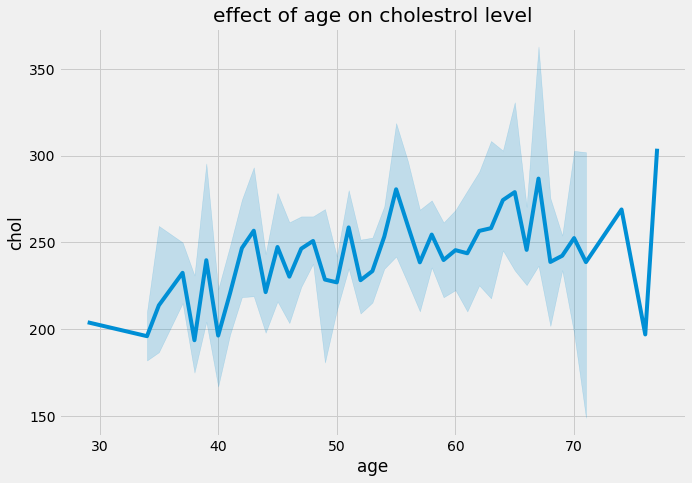

In [71]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on cholestrol level")
sns.lineplot(x=heart['age'],y=heart['chol'])
#as age is incresing the increase in the cholestrol level has been founded



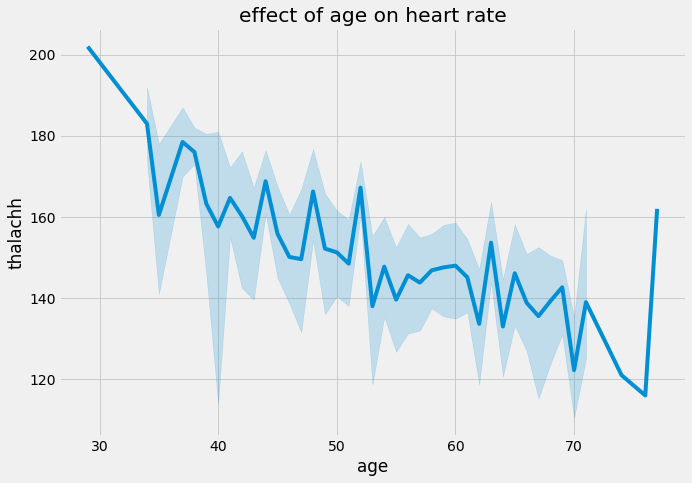

In [72]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart rate")
sns.lineplot(x=heart['age'],y=heart['thalachh'])
#as age is incresing the decrease in the heart rate has been founded



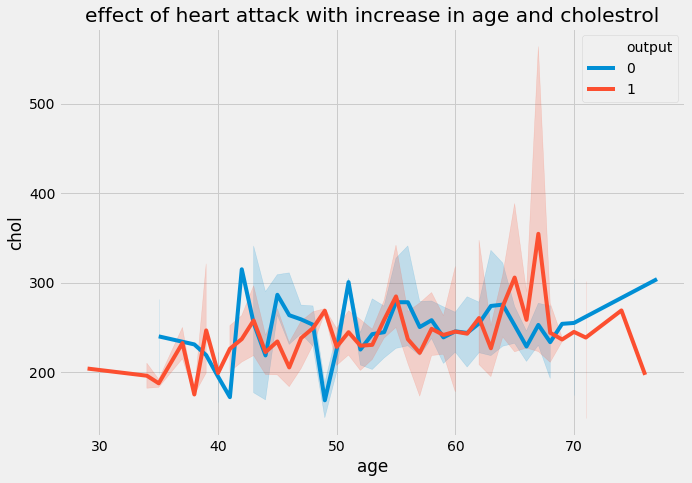

In [74]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and cholestrol")
sns.lineplot(x=heart['age'],y=heart['chol'],hue=heart['output'])
#as with the increase in the age the cholestrol level is incresing and also the people with more chances of heart attacks are also increasing hence we can say higher cholestrol level increases the chance of heart attack


In [75]:
target=heart['output']
heart.drop(['output'],axis=1,inplace=True)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(heart)
standard_df = pd.DataFrame(standard_df, columns =['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

In [79]:
x_train,x_test,y_train,y_test=train_test_split(standard_df,target,test_size=0.1,random_state=42)

In [80]:
logistic=LogisticRegression(max_iter=100,random_state=1,n_jobs=-1)
logistic.fit(x_train,y_train)
pred1=logistic.predict(x_test)
pred1

C:\Users\joshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joshi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score
print('Logisctic Regression model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred1)*100))

Logisctic Regression model accuracy score: 80.6452


In [95]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
d_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100)
#print(f'{acc_decision_tree}%')
acc_decision_tree

100.0

In [99]:
print('Decision Tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, d_pred)*100))

Decision Tree model accuracy score: 80.6452


In [84]:
accuracy_score(y_test, d_pred)*100

80.64516129032258

In [100]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree'],
    'Score' : [accuracy_score(y_test, pred1)*100,accuracy_score(y_test, d_pred)*100,]})


#models.sort_values(by = 'Score', ascending = False)
models

,Model,Score
0,Logistic Regression,80.645161
1,Decision Tree,80.645161


In [92]:
#dataframe for comparision
compare=pd.DataFrame()
compare['original_outcome']=y_test
compare['pred_by_lr']=pred1
compare['pred_by_decisiontree']=d_pred
compare

,original_outcome,pred_by_lr,pred_by_decisiontree
179,0,0,0
228,0,1,0
111,1,1,0
246,0,0,0
60,1,1,1
9,1,1,0
119,1,1,1
223,0,0,0
268,0,0,0
33,1,0,1
